<a href="https://colab.research.google.com/github/stymgupta/2-Prediction-using-Unsupervised-ML/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2: Prediction using Unsupervised ML**

**Problem: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.**

Dataset: https://bit.ly/3kXTdox

***Author: Vaibhav Kumar***

**Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

**Reading the Dataset**

In [ ]:
ir = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Iris.csv")
print("Imported Successfully")
ir.head()

Imported Successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Number of Rows and Columns
ir.shape

(150, 6)

In [ ]:
#information about the columns
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#Dropping Id Column
ir.drop("Id", axis =1, inplace=True)

In [ ]:
#Descripsion of Datasets
ir.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking whether the Dataset contains any Null or Duplicate Value on not**


In [ ]:
ir.isnull().sum() #for null value

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
ir.duplicated().sum() #for duplicate value

3

In [ ]:
#drop duplicate rows
ir.drop_duplicates(inplace=True)
ir.shape[0]

147

**Visualization of the Dataset**

In [ ]:
sns.pairplot(iris, hue='Species')

**Correletion Matrix**

In [ ]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


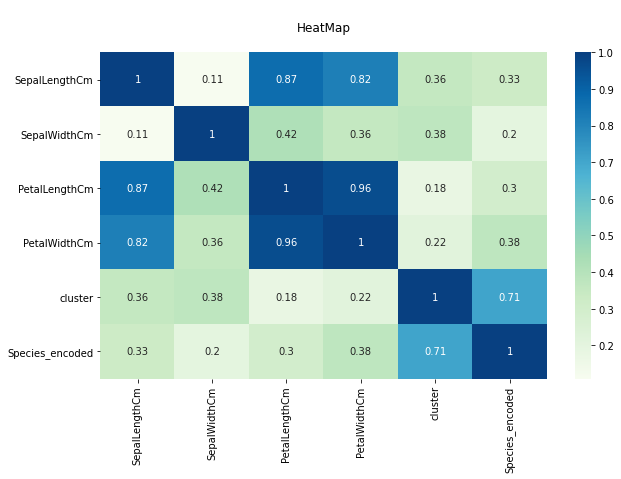

In [ ]:
#Constructing Heatmap to understanding Correlation
plt.figure(figsize= (10,6))
plt.title("\nHeatMap\n")
sns.heatmap(abs(ir.corr()), cmap='GnBu', annot=True);

**K-Means Clusturing**

**For Optimal Solution, Elbow Method Implemented**

In [ ]:
a = ir.iloc[:,[0,1,2,3]]
wcss=[]
for i in range(1,10):
  kmeans = KMeans(n_clusters=i, init='k-means++', n_jobs= -1)
  kmeans.fit(a)
  wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The Elbow Method')

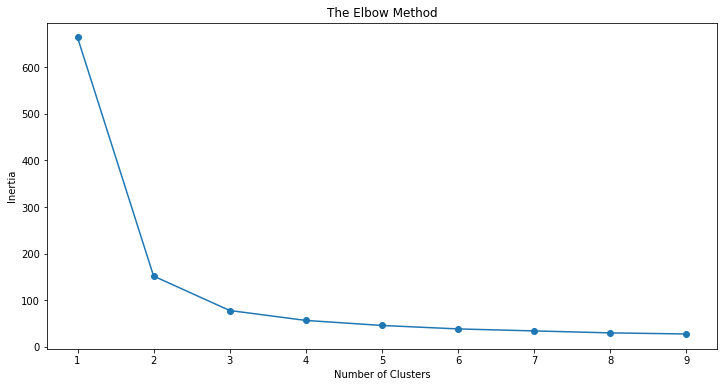

In [ ]:
#Ploting the Elbow Method
df = pd.DataFrame({'Cluster':range(1,10), 'wcss':wcss})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['wcss'], marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel('Inertia')
plt.title("The Elbow Method")

**Training the K-Means Clustering Model**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_jobs= -1)
kmeans.fit(a)
kmeans.cluster_centers_

array([[5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
ir['cluster']=kmeans.labels_
ir

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [ ]:
display(ir['cluster'].value_counts(), ir['Species'].value_counts())

0    61
1    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

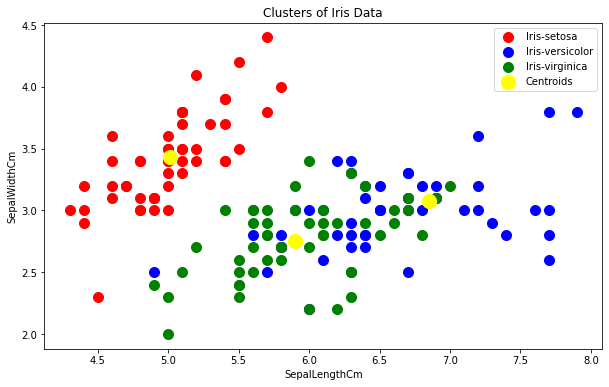

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans ==0,0], x[y_kmeans==0,1], s=100, c='red', label="Iris-setosa")
plt.scatter(x[y_kmeans ==1,0], x[y_kmeans==1,1], s=100, c='blue', label="Iris-versicolor")
plt.scatter(x[y_kmeans ==2,0], x[y_kmeans==2,1], s=100, c='green', label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='yellow', label="Centroids")
plt.title("Clusters of Iris Data")
plt.xlabel('SepalLengthCm', fontsize=10)
plt.ylabel('SepalWidthCm', fontsize=10)
plt.legend()

In [ ]:
ir['Species_encoded'] = ir['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
ir

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


**Import Classification Report**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ir['Species_encoded'], ir['cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



**Import Confusion Matrix**

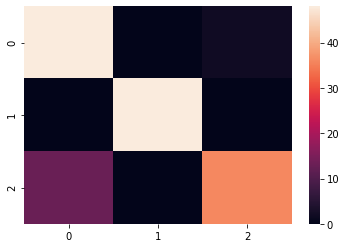

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(ir['Species_encoded'], ir['cluster']))

# **Conclusion: The Optimal Solution for the given data is 3**